In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

In [28]:
### characteristics of each asset
game_step = {'expected_return': 0.25, 'volatility': 0.15}
nukia = {'expected_return': 0.15, 'volatility': 0.07}
correlation = 0.3

### creates list of 21 diferent ratio combinations 
allocation_strategies = [[w, 1-w] for w in np.linspace(0, 1, 21)]

# calculates the portfolio volatility for a given allocation strategy and correlation
def calculate_portfolio_vol(weight_a, weight_b, correlation):
    vol_a = game_step['volatility']
    vol_b = nukia['volatility']
    portf_variance_formula =  ( 
        ( weight_a**2 ) * (vol_a**2)
        + ( weight_b**2 ) * (vol_b**2 )
        + 2*correlation*weight_a*weight_b*vol_a*vol_b
                              )
                              
    portf_volatility = portf_variance_formula**(1/2)
    return portf_volatility

def calculate_portfolio_returns(weight_a, weight_b):
    ret_a = weight_a * game_step['expected_return']
    ret_b = weight_b * nukia['expected_return']
    combined_return = ret_a + ret_b
    return combined_return


### loops through every allocation strategy and calculates its combined return
import pandas as pd
def test_allocation(allocation_strategies, correlation):
    d = {}
    portfolio_returns = []
    portfolio_volatility = []
    portfolio_sharpe = []
    for allocation in allocation_strategies:
        weight_a = allocation[0]
        weight_b = allocation[1]
        
        
        combined_return = calculate_portfolio_returns(
            weight_a, 
            weight_b)
        
        portfolio_returns.append(combined_return)
        
        combined_vol = calculate_portfolio_vol(
            weight_a, 
            weight_b, 
            correlation)
        
        portfolio_volatility.append(combined_vol)
        
        portfolio_sharpe.append(combined_return/combined_vol)
    
    d['returns'] = portfolio_returns
    d['volatility'] = portfolio_volatility
    d['sharpe'] = portfolio_sharpe
    return pd.DataFrame(d)





# creates labels that are more readable (to use in our charts)
alloc_labels = [
    (f'{int(i[0]*100)}-{int(i[-1]*100)}') for i in allocation_strategies
] 



In [31]:
portfolios_df = test_allocation(allocation_strategies, correlation)
portfolios_df.head()

,returns,volatility,sharpe
0,0.150,0.070000,2.142857
1,0.155,0.069121,2.242436
2,0.160,0.069000,2.318841
3,0.165,0.069640,2.369323
4,0.170,0.071021,2.393654


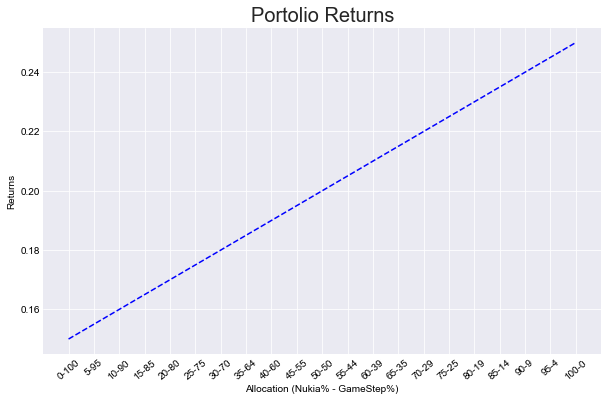

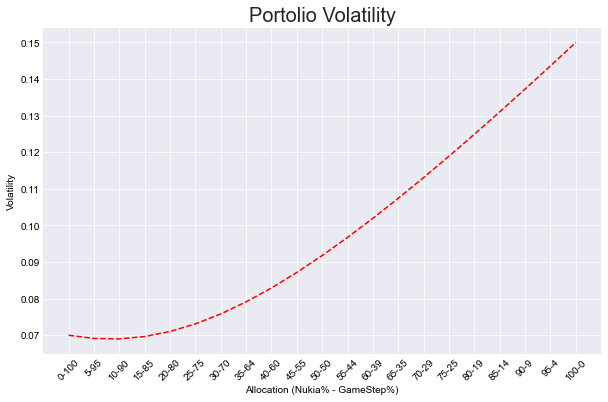

In [120]:

# plots figure
f = plt.figure(figsize=(10, 6))
plt.plot(alloc_labels, 
         portfolios_df['returns'], 
         linestyle ='dashed', color='blue'
        )
plt.title('Portolio Returns', fontsize=20)
plt.tick_params(axis ='x', labelcolor = 'black', rotation=40,)
plt.ylabel('Returns', color = 'black') 
plt.tick_params(axis ='y', labelcolor = 'black')
plt.tick_params(axis ='x', labelcolor = 'black', rotation=40,)
plt.xlabel('Allocation (Nukia% - GameStep%)',  color = 'black')
plt.show()


### plots the portfolio volatility curve
f = plt.figure(figsize=(10, 6))
plt.plot(alloc_labels, 
         portfolios_df['volatility'], 
         linestyle ='dashed', color='red')
plt.title('Portolio Volatility', fontsize=20)
plt.tick_params(axis ='x', labelcolor = 'black', rotation=45)         
plt.ylabel('Volatility', color = 'black') 
plt.tick_params(axis ='y', labelcolor = 'black')
plt.xlabel('Allocation (Nukia% - GameStep%)',  color = 'black')
plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


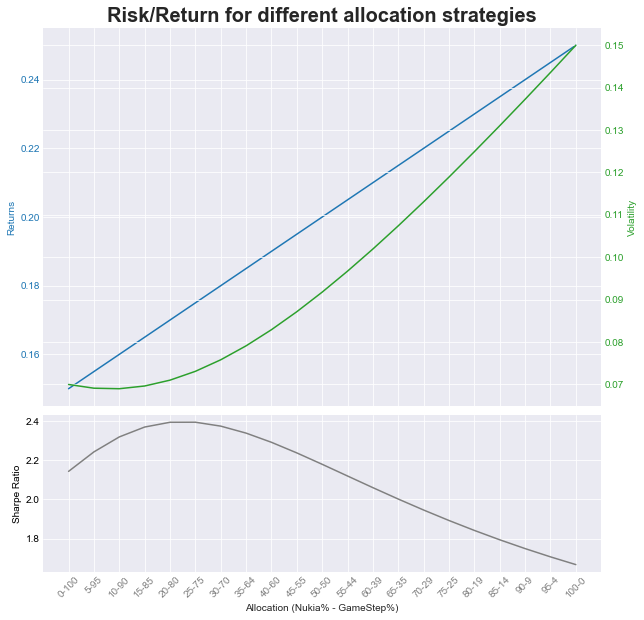

In [130]:


# creates figure and subplots
fig, axs = plt.subplots(10, 10, 
                        figsize=(10, 10), 
                        sharex=True)
ax1 = plt.subplot2grid(shape=(10, 7), 
                       loc=(0,0), 
                       colspan=10, 
                       rowspan=7)
ax3 = plt.subplot2grid(shape=(10, 3), 
                       loc=(7,0), 
                       colspan=10, 
                       rowspan=3)    


### plots the portfolio returns curve
color = 'tab:blue'
ax1.set_ylabel('Returns', color = color)  
ax1.plot(alloc_labels, 
         portfolios_df['returns'], 
         color = color,)  
ax1.set_ylabel('Returns', 
               color = color) 
plt.legend()
ax1.tick_params(axis ='y', 
                labelcolor = color)
ax1.tick_params(axis ='x', 
                labelcolor = 'white')


# Adding Twin Axes to plot portfolio volatility on the same subplot as ax1 
ax2 = ax1.twinx()  

### plots the portfolio returns curve
color = 'tab:green'
ax2.set_ylabel('Volatility', 
               color = color)  
ax2.plot(alloc_labels, 
         portfolios_df['volatility'], color = color, 
        )  
ax2.tick_params(axis ='y', 
                labelcolor = color)  
  
plt.legend()
# Adding title 
plt.title('Risk/Return for different allocation strategies', 
          fontweight ="bold", fontsize=20)  
  

ax3.plot(alloc_labels, 
            portfolios_df['sharpe'], 
            color='gray',
           label='Sharpe Ratio',
         
        )
ax3.set_ylabel('Sharpe Ratio', color = 'black') 
ax3.tick_params(axis ='y', labelcolor = 'black')
ax3.tick_params(axis ='x', labelcolor = 'gray', rotation=45,)
ax3.set_xlabel('Allocation (Nukia% - GameStep%)')  
plt.legend()
plt.show()


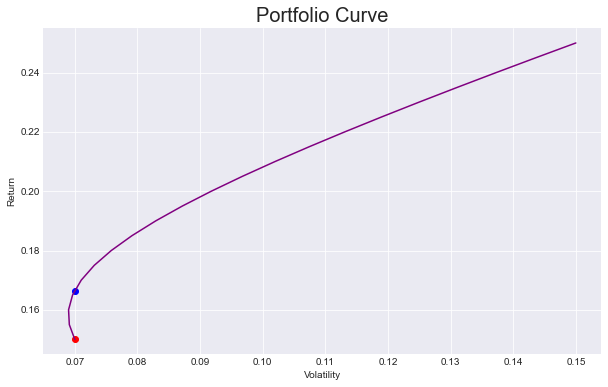

In [131]:


plt.figure(figsize=(10, 6))
plt.plot(portfolios_df['volatility'],
         portfolios_df['returns'], color='purple'
        )

plt.title('Portfolio Curve', fontsize=20)
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(nukia['volatility'], nukia['expected_return'], color='red')
plt.scatter(nukia['volatility'], 0.1665
            , color='blue')


plt.show()

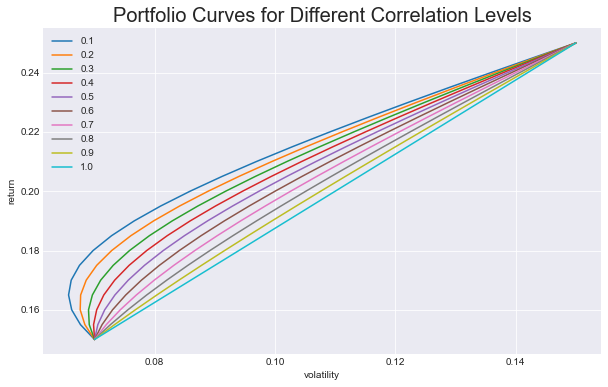

In [132]:
plt.figure(figsize=(10, 6))
for corr in np.linspace(0.1, 1, 10):
    corr_df = test_allocation(allocation_strategies, corr)
    
    plt.plot(corr_df['volatility'],
         corr_df['returns'], label=round(corr, 1)
        )

plt.title('Portfolio Curves for Different Correlation Levels', fontsize=20)
plt.xlabel('volatility')
plt.ylabel('return')
plt.legend()
plt.show()

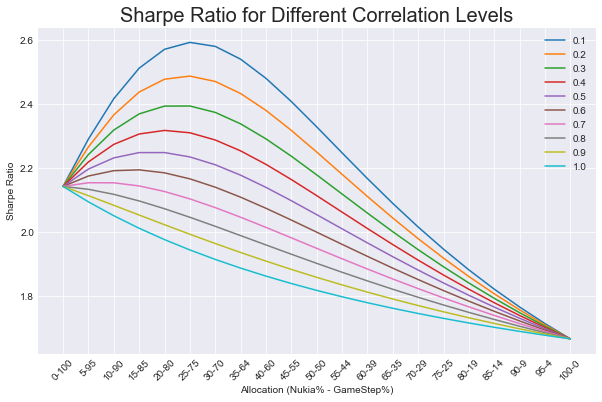

In [134]:
plt.figure(figsize=(10, 6))
for corr in np.linspace(0.1, 1, 10):
    corr_df = test_allocation(allocation_strategies, corr)
    
    plt.plot(alloc_labels,
         corr_df['sharpe'], label=round(corr, 1)
        )

plt.title('Sharpe Ratio for Different Correlation Levels', fontsize=20)
plt.tick_params(axis='x', rotation=45)
plt.xlabel('Allocation (Nukia% - GameStep%)')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.show()